In [12]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from PIL import Image
import numpy as np
import IPython.display as display
tf.enable_eager_execution()

In [23]:
raw_image_dataset = tf.data.TFRecordDataset('../data/office31/amazon/train.tfrecords')

def deserialise_image(serialised_example, shape=[227,227,3]):
    feature = {'image': tf.FixedLenFeature([], tf.string, default_value=''),
               'label': tf.FixedLenFeature([], tf.int64, default_value=0)}

    parsed_example = tf.io.parse_single_example(
        serialized=serialised_example,
        features=feature
    )
    image = tf.decode_raw(parsed_example['image'], tf.uint8)
    parsed_example['image'] = tf.reshape(image, list(shape))
    return parsed_example

parsed_image_dataset = raw_image_dataset.map(deserialise_image)
parsed_image_dataset

<DatasetV1Adapter shapes: {image: (227, 227, 3), label: ()}, types: {image: tf.uint8, label: tf.int64}>

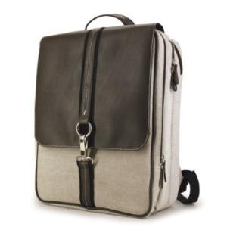

tf.Tensor(0, shape=(), dtype=int64)


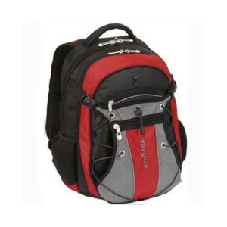

tf.Tensor(0, shape=(), dtype=int64)


In [26]:
for i, image_features in enumerate(parsed_image_dataset):
    display.display(Image.fromarray(np.array(image_features['image']), 'RGB'))
    print(image_features['label'])
    if (i == 1):
        break